In [1]:
#WriteUp_TrafficSignClassifer_p1

### Goal : Design German traffic signs classifier using TensorFlow.

This project will hve the following phases :

 1. Load Data set &Dataset Summary 
 2. Exploratory Visualization 
 3. Preprocessing    
 4. Model Architecture
 5. Model Training
 6. Solution Approach 
## Test a Model on New Images

 7. Acquiring New Images
 8. Performance on New Images
 9. Model Certainty - Softmax Probabilities


## 1. Load Data set & Dataset Summary 

. Data Set is in the file traffic-signs-data.zip.

. It contains 3 pickle files and a csv file. (test.p, train.p,  valid.p,  signnames.csv)

    . They contains  test,  training, and validation images.  
    . The images are resized to 32x32 pixels.

. The signnames.csv is a data base  with the first column containing
    1. the class ID (an integer spanning 0-42), and 
    2. the second column containing a descriptive name of the sign

. Here are the sample of  rows: 

      1. 10,No passing for vehicles over 3.5 metric tons
      2. 11,Right-of-way at the next intersection
      3. 12,Priority road
      4. 13,Yield
      5. 14,Stop
      6. 15,No vehicle

This ZIP file (traffic-signs-data.zip) can get from:

https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip

## 2. Exploratory Visualization 

In [4]:
from lib_traffic_sign_classifier import *

In [5]:
X_train, y_train, X_valid, y_valid, X_test, y_test = load_training_data()
n_classes = summary_data_set (X_train, y_train, X_valid, y_valid, X_test, y_test)

Number of training examples   = 34799
Number of validation examples = 4410
Number of testing examples    = 12630
Image data shape              = (32, 32, 3)
Number of classes             = 43


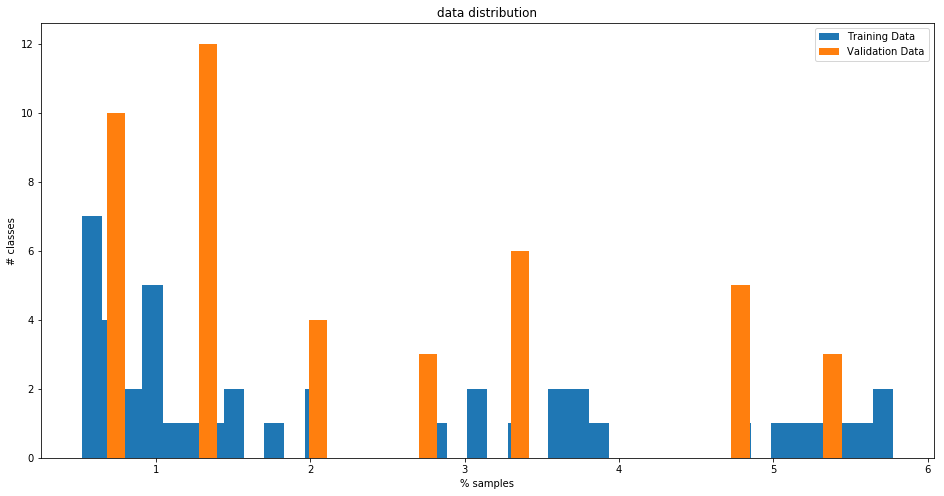

In [6]:
display_dataset_distributions(mydata=[y_train, y_valid], labels=["Training Data", "Validation Data"])

### Distrition of valid sign in data set

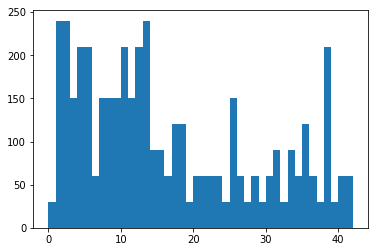

In [10]:
%matplotlib inline
distribution_valid_traffic_sign(y_valid)

### Sample of valid Traffic sign:

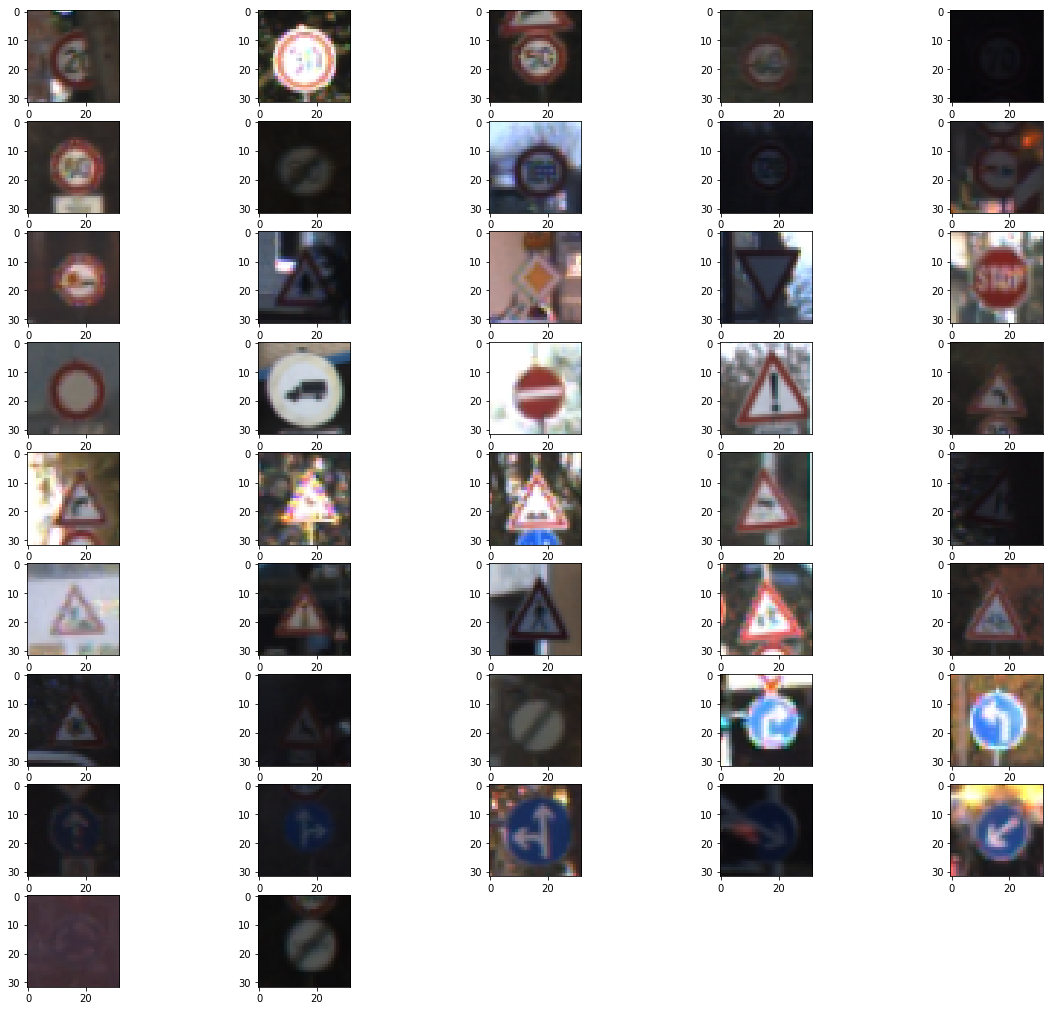

In [11]:
display_valid_traffic_sign(sample_valid_traffic_sign (X_valid, y_valid))

## 3. Preprocessing Data Set

Creating function preprocessing(dataSet) to normalize image before any processing (pixel - 128)/ 128.

Then Training data is shuffled before use.

### process_X_train = preprosessing_data (X_train). 

In [6]:
process_X_train = preprocessing_data (X_train)
process_y_train = y_train

process_X_valid = preprocessing_data(X_valid.astype(np.float32))
process_y_valid = y_valid

process_X_test = preprocessing_data(X_test.astype(np.float32))
process_y_test = y_test

In [7]:
# Testing preprocessing:
random_plot(X_train, process_X_train, 5)

In [8]:
#from sklearn.utils import shuffle
process_X_train, process_y_train = shuffle(process_X_train, process_y_train)

## 4. Model Architecture

## 5. Model Training


In [9]:
rate               = 0.001; EPOCHS             = 100; BATCH_SIZE         = 128; trained_model_file = "./LenetTrafficSign_Lenet2_8"

In [10]:
from lib_traffic_sign_classifier import *
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

In [11]:
#logits = LeNet(x)
logits = Lenet2(x)

In [12]:
one_hot_y          = tf.one_hot(y, n_classes)

cross_entropy      = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation     = tf.reduce_mean(cross_entropy)

optimizer          = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver              = tf.train.Saver()


In [13]:
from time import sleep, perf_counter as pc

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...rate = %.3f BATCH_SIZE = %d Epoch = %d " % (rate, BATCH_SIZE, EPOCHS))
    t0 = pc()
    for i in range(EPOCHS):
        t_epoch = pc()
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            sess.run(training_operation,  feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = calculate_accuracy(X_valid, y_valid, x, y, accuracy_operation, BATCH_SIZE)

        t_epoch_time = (pc() - t_epoch)
        total_time = (pc()-t0)
        print("EPOCH {} ...   Validation Accuracy = {:.3f} took {:.3f} sec -- TotalTime = {:.3f} sec" .format ((i+1), validation_accuracy, t_epoch_time, total_time))

    saver.save(sess, trained_model_file)
    total_time = (pc()-t0)
    print()
    print("Model saved in : %s Took: %d sec " %(trained_model_file, total_time) )

Training...rate = 0.001 BATCH_SIZE = 128 Epoch = 100 
EPOCH 1 ...   Validation Accuracy = 0.584 took 103.432 sec -- TotalTime = 103.432 sec
EPOCH 2 ...   Validation Accuracy = 0.755 took 106.447 sec -- TotalTime = 209.879 sec
EPOCH 3 ...   Validation Accuracy = 0.818 took 107.547 sec -- TotalTime = 317.426 sec
EPOCH 4 ...   Validation Accuracy = 0.841 took 109.365 sec -- TotalTime = 426.792 sec
EPOCH 5 ...   Validation Accuracy = 0.852 took 111.634 sec -- TotalTime = 538.426 sec
EPOCH 6 ...   Validation Accuracy = 0.845 took 110.786 sec -- TotalTime = 649.212 sec
EPOCH 7 ...   Validation Accuracy = 0.845 took 115.810 sec -- TotalTime = 765.022 sec
EPOCH 8 ...   Validation Accuracy = 0.872 took 114.274 sec -- TotalTime = 879.297 sec
EPOCH 9 ...   Validation Accuracy = 0.875 took 114.971 sec -- TotalTime = 994.268 sec
EPOCH 10 ...   Validation Accuracy = 0.881 took 117.744 sec -- TotalTime = 1112.012 sec
EPOCH 11 ...   Validation Accuracy = 0.883 took 118.448 sec -- TotalTime = 1230.460 

EPOCH 95 ...   Validation Accuracy = 0.950 took 45.448 sec -- TotalTime = 7312.127 sec
EPOCH 96 ...   Validation Accuracy = 0.957 took 46.006 sec -- TotalTime = 7358.134 sec
EPOCH 97 ...   Validation Accuracy = 0.940 took 46.594 sec -- TotalTime = 7404.727 sec
EPOCH 98 ...   Validation Accuracy = 0.936 took 46.664 sec -- TotalTime = 7451.391 sec
EPOCH 99 ...   Validation Accuracy = 0.939 took 44.994 sec -- TotalTime = 7496.385 sec
EPOCH 100 ...   Validation Accuracy = 0.942 took 45.132 sec -- TotalTime = 7541.517 sec

Model saved in : ./LenetTrafficSign_Lenet2_8 Took: 7541 sec 
